# **Amazon Fine Food Reviews Project by Ann-Marie Mensah**


### **Introduction** 

In this project, I analysed the Amazon Fine Food Reviews dataset which has over 500,000 food reviews.

### **Dataset Description**

This dataset consists of reviews of fine foods from Amazon. The data span a period of more than 10 years with over 500,000 reviews up to October 2012. The reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.


This machine learning pipeline is a binary classification problem using Logistic Regression, K-Nearest Neighbors and Naïve Bayes classification models to classify the food reviews.

# **Load Libraries**

In [1]:
import pandas as pd
import numpy as np
from numpy import array
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Load Dataset**

In [4]:
reviews = pd.read_csv('amazonreviews.csv', quoting=3, on_bad_lines='skip')
reviews.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1.346976e+09,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5.0,1.322006e+09,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [5]:
# This method prints information about the DataFrame including the index dtype and 
#columns, non-null values and memory usage. Information for this dataset shows that there are 4803 entries
# of datatypes integer, string and float.

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70319 entries, 0 to 70318
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      70319 non-null  int64  
 1   ProductId               70319 non-null  object 
 2   UserId                  70319 non-null  object 
 3   ProfileName             70313 non-null  object 
 4   HelpfulnessNumerator    70318 non-null  object 
 5   HelpfulnessDenominator  70318 non-null  object 
 6   Score                   70318 non-null  float64
 7   Time                    70318 non-null  float64
 8   Summary                 70318 non-null  object 
 9   Text                    70318 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.4+ MB


In [6]:
## Checking for any duplicates in the dataset 

reviews.duplicated().sum()

0

In [7]:
##Checking for null values in the dataset

reviews.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               6
HelpfulnessNumerator      1
HelpfulnessDenominator    1
Score                     1
Time                      1
Summary                   1
Text                      1
dtype: int64

In [8]:
##Removing the nullvalues from the dataset

reviews.isnull().sum()
reviews.dropna(how='any',inplace=True)

In [9]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1.346976e+09,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5.0,1.322006e+09,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for thei...


# **Data Cleaning and Preprocessing**

In [10]:
#Dropping labels

columns = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
           'HelpfulnessDenominator', 'Score',	'Time', 'Summary', 'Text']
new_reviews = reviews.drop(columns=['ProfileName','Time', 'HelpfulnessNumerator', 
                                'HelpfulnessDenominator'], axis=1)
new_reviews.head()


,Id,ProductId,UserId,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5.0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,1.0,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,2.0,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,5.0,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,5.0,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [11]:
#Removing Neutral Views

new_reviews['Score'] = pd.to_numeric(new_reviews['Score'], errors='coerce')
new_reviews.dropna(inplace=True)
new_reviews[new_reviews['Score'] != 3]
new_reviews['positive_negative'] = np.where(new_reviews['Score'] > 3, 1, 0)
new_reviews.head()

,Id,ProductId,UserId,Score,Summary,Text,positive_negative
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5.0,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,1.0,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu...",0
2,4,B000UA0QIQ,A395BORC6FGVXV,2.0,Cough Medicine,If you are looking for the secret ingredient i...,0
3,9,B000E7L2R4,A1MZYO9TZK0BBI,5.0,Yay Barley,Right now I'm mostly just sprouting this so my...,1
4,10,B00171APVA,A21BT40VZCCYT4,5.0,Healthy Dog Food,This is a very healthy dog food. Good for thei...,1


In [12]:
new_reviews.shape

(70313, 7)

In [13]:
# Removing stopwords

letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(new_reviews['Summary']))
tokens = word_tokenize(letters_only)
filtered_tokens = [word for word in tokens if not word in stopwords.words('english')]
filtered_tokens

['Good',
 'Quality',
 'Dog',
 'Food',
 'Not',
 'Advertised',
 'Cough',
 'Medicine',
 'Yay',
 'Barley',
 'Healthy',
 'Dog',
 'Food',
 'Wonderful',
 'Great',
 'Product',
 'Good',
 'Tasting',
 'Drink',
 'great',
 'I',
 'work',
 'Name',
 'Summary',
 'Length',
 'dtype',
 'object']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

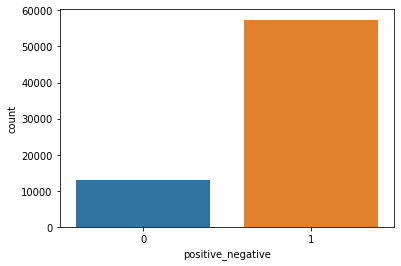

In [14]:
#Showing Positive and Negative Score Distribution

sns.countplot(new_reviews['positive_negative'])
plt.show

# **Balancing positive_negative Score Distribution** 


In [21]:
### Balancing positive_negative Score Distribution 

pos = new_reviews[new_reviews['positive_negative']==1]
neg = new_reviews[new_reviews['positive_negative']==0]
new = pd.concat([pos[0:13000], neg[0:13000]], axis=0)
new.head()

,Id,ProductId,UserId,Score,Summary,Text,positive_negative
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5.0,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
3,9,B000E7L2R4,A1MZYO9TZK0BBI,5.0,Yay Barley,Right now I'm mostly just sprouting this so my...,1
4,10,B00171APVA,A21BT40VZCCYT4,5.0,Healthy Dog Food,This is a very healthy dog food. Good for thei...,1
5,14,B001GVISJM,A18ECVX2RJ7HUE,4.0,fresh and greasy!,good flavor! these came securely packed... the...,1
6,15,B001GVISJM,A2MUGFV2TDQ47K,5.0,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

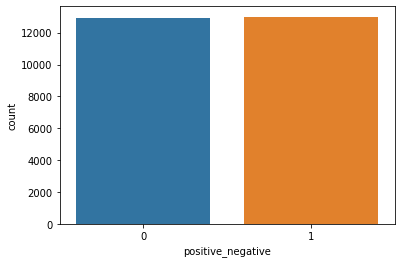

In [22]:
sns.countplot(new['positive_negative'])
plt.show

# **Split Data into Train and Test**

In [23]:
x = new_reviews['Summary'] #input
y = new_reviews['positive_negative'] #output
x_train, x_test, y_train, y_test = train_test_split(x, y)

print("The size of x_train:", x_train.shape)
print("The size of y_train:", y_train.shape)
print("The size of x_test:", x_test.shape)
print("The size of y_test:", y_test.shape)

The size of x_train: (52734,)
The size of y_train: (52734,)
The size of x_test: (17579,)
The size of y_test: (17579,)


# **Feature Engineering**

In [24]:
vectorizer = TfidfVectorizer(min_df=5)
vector = vectorizer.fit(x_train)
 
new_x_train = vectorizer.transform(x_train).toarray()
new_x_test = vectorizer.transform(x_test).toarray()

print("The size of new_x_train:", new_x_train.shape)
print("The size of new_x_test:", new_x_test.shape)


The size of new_x_train: (52734, 2795)
The size of new_x_test: (17579, 2795)


# **Train a Model**

In [25]:
#Logistic Regression 

model_1 = LogisticRegression(max_iter=3000)
model_1.fit(new_x_train, y_train);

In [26]:
#Naive Bayes

model_2 = MultinomialNB()
model_2.fit(new_x_train, y_train)

MultinomialNB()

In [27]:
#K Nearest Neighbors

model_3 = KNeighborsClassifier()
model_3.fit(new_x_train, y_train)

KNeighborsClassifier()

# **Test a Model**

In [28]:
#Logistic Regression

y_predicted_1 = model_1.predict(new_x_test)
y_predicted_1

array([1, 1, 0, ..., 1, 1, 1])

In [29]:
#Naive Bayes

y_predicted_2 = model_2.predict(new_x_test)
y_predicted_2

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
#K Nearest Neighbors

y_predicted_3 = model_3.predict(new_x_test)
y_predicted_3

array([1, 1, 0, ..., 1, 1, 1])

# **Predictions**

In [31]:
#Logistic Regression

statements = ["The food is tasty", "The food is horrible"]
encoded_statements = vectorizer.transform(statements).toarray()
predicted_class = model_1.predict(encoded_statements)
predicted_class

array([1, 0])

In [32]:
#Naive Bayes

statements = ["The food is tasty", "The food is horrible"]
encoded_statements = vectorizer.transform(statements).toarray()
predicted_class = model_2.predict(encoded_statements)
predicted_class


array([1, 0])

In [33]:
#K Nearest Neighbors

statements = ["The food is tasty", "The food is horrible"]
encoded_statements = vectorizer.transform(statements).toarray()
predicted_class = model_3.predict(encoded_statements)
predicted_class

array([1, 0])

# **Classifier Summary**

In [34]:
#Logistic Regression

print(classification_report(y_test, y_predicted_1))

              precision    recall  f1-score   support

           0       0.84      0.59      0.69      3265
           1       0.91      0.97      0.94     14314

    accuracy                           0.90     17579
   macro avg       0.88      0.78      0.82     17579
weighted avg       0.90      0.90      0.90     17579



In [35]:
#Naive Bayes

print(classification_report(y_test, y_predicted_2))

              precision    recall  f1-score   support

           0       0.83      0.51      0.63      3265
           1       0.90      0.98      0.94     14314

    accuracy                           0.89     17579
   macro avg       0.86      0.74      0.78     17579
weighted avg       0.88      0.89      0.88     17579



In [36]:
#K Nearest Neighbors

print(classification_report(y_test, y_predicted_3))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      3265
           1       0.91      0.96      0.93     14314

    accuracy                           0.89     17579
   macro avg       0.84      0.77      0.80     17579
weighted avg       0.88      0.89      0.88     17579



# Conclusion

I examined the Amazon Fine Food Reviews dataset for this project and my analysis revealed that the Logistic Regression model had the best accuracy score of 90%, making it the best model in predicting Amazon Fine Food Reviews even though K-NN and Naive Bayes performed well too. 

I also predicted some reviews. Prediction in machine learning refers to the output of an algorithm after it has been trained on a historical dataset and applied to new data when forecasting the likelihood of a particular outcome. All three models predicted the outcomes correctly. 

Some limitations in this project were:
Only TF-IDF was used to represent texts in this sentiment analysis project. Further studies can be done where Bag of words or Bag of n-grams are used, and results compared.
Also, since just three machine learning classifiers were examined in this sentiment analysis project, future research can be done to explore other classifiers like Decision Tree and Support Vector Machines.